In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [33]:
data= pd.read_csv("loan_data.csv")

In [35]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [37]:
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [39]:
data.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [43]:
#Convertissons la variable previous_loan_defaults_on_file
data['previous_loan_defaults_on_file']= data['previous_loan_defaults_on_file'].map({'Yes':1, 'No': 0})

In [45]:
#Encodons les variables
df_encoded= pd.get_dummies( data, columns=[
    'person_gender',
    'person_education',
    'person_home_ownership',
    'loan_intent'
], drop_first= True) 

df_encoded.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,...,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,0,1,...,False,True,False,False,True,False,False,False,True,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,0,...,True,False,False,True,False,True,False,False,False,False
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,1,...,True,False,False,False,False,False,False,True,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,0,1,...,False,False,False,False,True,False,False,True,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,0,1,...,False,True,False,False,True,False,False,True,False,False


In [47]:
#Separons nos variables
X= df_encoded.drop("loan_status", axis=1)
y= df_encoded["loan_status"]

#Separons les donnes en train et en test

X_train, X_test, y_train, y_test= train_test_split(
    X, y, test_size=0.3, random_state= 42, stratify=y
)

In [49]:
#Entrainement du model

tree_model= DecisionTreeClassifier(random_state=42)

#Entrainement avec données de test
tree_model.fit(X_train, y_train)

print ("Classes apprises:", tree_model.classes_)

Classes apprises: [0 1]


In [51]:
#Prediction et evaluation

y_pred= tree_model.predict(X_test)

#Matrice de confusion
matric= confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")

#Rapport de classification
report= classification_report(y_test, y_pred, output_dict= True)
report_df= pd.DataFrame(report).transpose()
print("\nRapport de classificatiom:")
print (report_df)


Matrice de confusion :

Rapport de classificatiom:
              precision    recall  f1-score       support
0              0.933600  0.932000  0.932800  10500.000000
1              0.763419  0.768000  0.765703   3000.000000
accuracy       0.895556  0.895556  0.895556      0.895556
macro avg      0.848510  0.850000  0.849251  13500.000000
weighted avg   0.895782  0.895556  0.895667  13500.000000


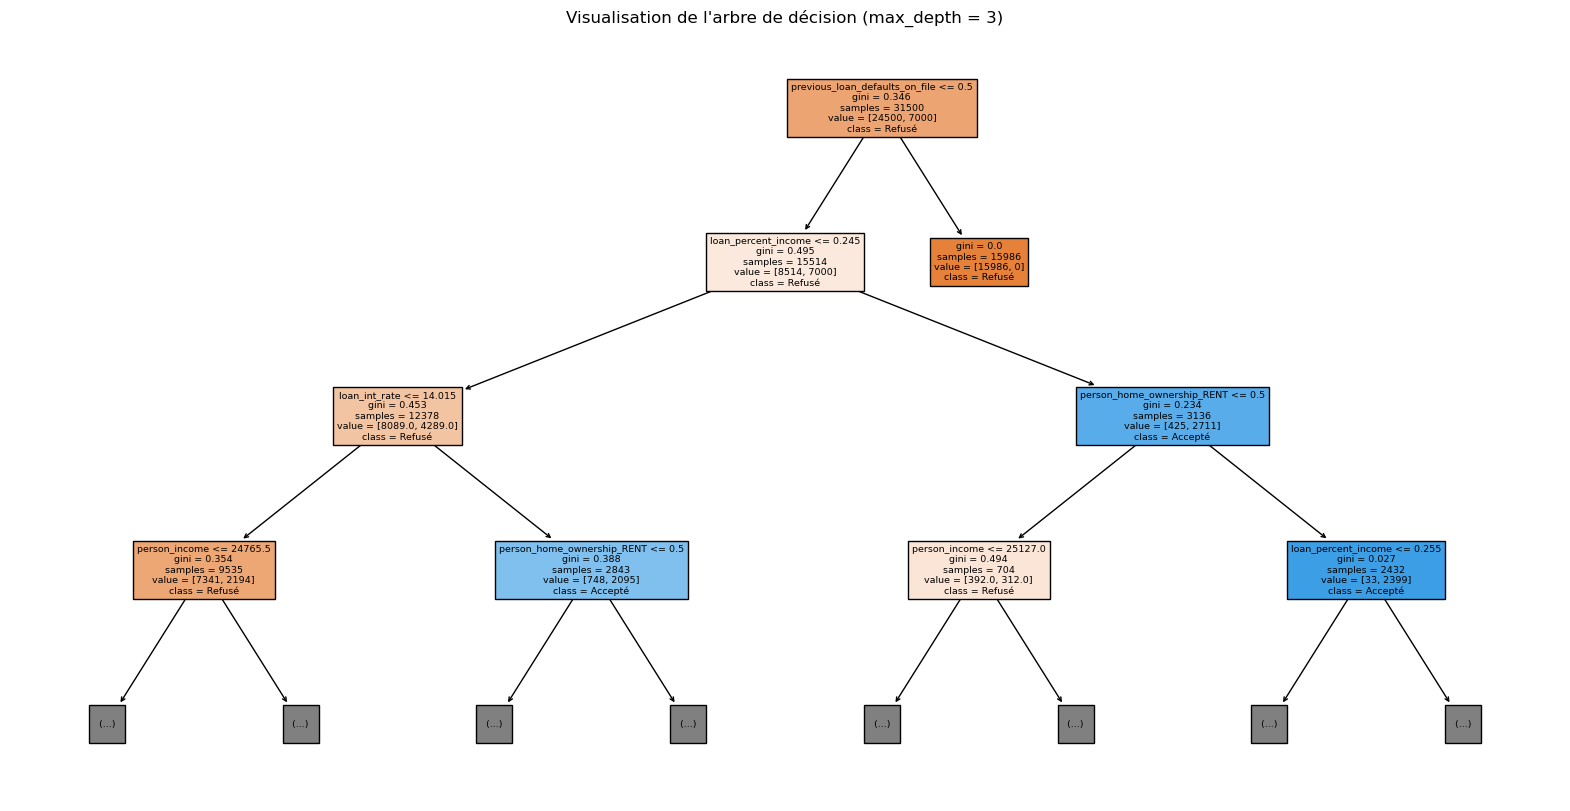

In [55]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# ÉTAPE : VISUALISATION DE L'ARBRE
plt.figure(figsize=(20, 10))  # Ajuste la taille selon ton écran
plot_tree(
    tree_model,
    feature_names=X.columns,
    class_names=["Refusé", "Accepté"],
    filled=True,
    max_depth=3  # Limite l'affichage à 3 niveaux pour que ce soit lisible
)
plt.title("Visualisation de l'arbre de décision (max_depth = 3)")
plt.savefig("Arbre de decision", dpi=300, bbox_inches='tight')
plt.show()
 